# Daten herunterladen:

https://drive.google.com/open?id=1kCYv7qOFqk_hldi7rKaBkZovVTyndVfP oder

https://shop.swisstopo.admin.ch/de/products/landscape/names3D

swissNAMES3D_LV95

shp_LV95_LN02

Benötigte Dateien:

swissNAMES3D_PKT.dbf

swissNAMES3D_PKT.prj

swissNAMES3D_PKT.shp

swissNAMES3D_PKT.shx

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import re

In [2]:
# Daten einlesen
gdf = gpd.read_file('shp_LV95_LN02/swissNAMES3D_PKT.shx')


In [3]:
gdf


,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
0,{2FF7E3F1-6BAA-4981-A172-A459E01982E8},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694037.021 1273364.505 389.545)
1,{AA4D0B0F-CA43-4B91-BFC3-32B9F3E2FEDB},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694225.446 1272960.581 386.701)
2,{358C0BD3-3DF7-4A49-B446-F156A2D3D865},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{D723A8F6-7E97-41D0-B042-0935835A017A},Winterthur-Töss,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695211.064 1260578.998 436.378)
3,{C4D61C3F-4A22-4474-9FD8-9532845AFFF4},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{4EF0E5A1-1AE2-4793-8073-3CA1AF521FCE},Wülflingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694252.651 1263268.638 412.791)
4,{082BA123-C0B5-47E3-9D86-8AC0DFD1025F},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{4EF0E5A1-1AE2-4793-8073-3CA1AF521FCE},Wülflingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694494.016 1263591.783 427.094)
5,{674B9162-0FCF-4972-B9A3-FDB9AFE55E89},Verzweigung,TLM_AUS_EINFAHRT,-999998.0,k_W,{1B56A862-5B35-44DD-8767-AB1D1180CCD0},Winterthur-Nord,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694852.543 1264108.073 438.363)
6,{ACF238B8-5177-4239-ACD1-B402F60F5920},Verzweigung,TLM_AUS_EINFAHRT,-999998.0,k_W,{1B56A862-5B35-44DD-8767-AB1D1180CCD0},Winterthur-Nord,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695091.488 1264580.048 432.101)
7,{1D10A30D-3B35-43AA-9F9D-6DD102D16B58},Verzweigung,TLM_AUS_EINFAHRT,-999998.0,k_W,{1B56A862-5B35-44DD-8767-AB1D1180CCD0},Winterthur-Nord,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695409.576 1264572.464 442.853)
8,{8E730905-A989-4D50-B921-2B8E4BDD5E5F},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AB641F44-EAEA-47DE-80A8-774A18032DA5},Winterthur-Ohringen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695995.191 1264426.583 458.974)
9,{F36B1E8E-978A-4F18-9060-41B7F8BF2169},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AB641F44-EAEA-47DE-80A8-774A18032DA5},Winterthur-Ohringen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2696459.446 1264408.235 472.927)


In [4]:
gdf.shape

(308200, 12)

In [5]:
#gdf['OBJEKTART'].unique()

array(['Ausfahrt', 'Verzweigung', 'Ein- und Ausfahrt', 'Zollamt 24h 24h',
       'Zollamt 24h eingeschraenkt', 'Zollamt eingeschraenkt',
       'Verladestation', 'Haltestelle Schiff', 'Haltestelle Bahn',
       'Uebrige Bahnen', 'Haltestelle Bus', 'Flurname swisstopo',
       'Lokalname swisstopo', 'Pass', 'Gipfel', 'Hauptgipfel',
       'Alpiner Gipfel', 'Huegel', 'Haupthuegel', 'Felskopf',
       'Strassenpass', 'Quelle', 'Grotte, Hoehle', 'Wasserfall',
       'Denkmal', 'Brunnen', 'Bildstock', 'Aussichtspunkt',
       'Landesgrenzstein', 'Erratischer Block', 'Felsblock', 'Gebaeude',
       'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle', 'Turm'],
      dtype=object)

In [6]:
gdf['OBJEKTKLAS'].unique()

array(['TLM_AUS_EINFAHRT', 'TLM_STRASSENINFO', 'TLM_HALTESTELLE',
       'TLM_FLURNAME', 'TLM_NAME_PKT', 'TLM_EINZELOBJEKT',
       'TLM_MORPH_KLEINFORM_PKT', 'TLM_GEBAEUDE'], dtype=object)

In [7]:
gdf['GEBAEUDENU'].unique()                 ## k_W  = kein Wert

array(['k_W', 'Gasthof abgelegen', 'Schiessstand', 'Stadion',
       'Schutzhuette', 'Stationsgebaeude', 'Observatorium',
       'Aussichtsturm', 'Leuchtturm', 'Sporthalle', 'Wasserturm'],
      dtype=object)

In [8]:
## Nur 123 Enträge in allen Sprachen?
gdf[gdf['OBJEKTART'] == 'Sakrales Gebaeude']

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
301345,{62B04421-690D-4285-9DA8-CA8D195D4F05},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{E0F42000-9F75-426C-8728-85DB0A33A635},Sogn Antoni,offiziell,Rumantsch Grischun inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2710578.212 1174281.606 1131.074)
301400,{D3DA38FE-917F-4DA5-A9FD-27F9C85C971B},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{642E9707-5F44-457F-8823-C688734E04E8},Piuskirche,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2670963.097 1211009.254 491.383)
301668,{D9EC3F91-4C28-4383-BA72-DBB3C99640E6},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{AEADA0E0-DAF3-44DA-B694-C96D682EC878},S. Martino,offiziell,Italienisch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2720087.344 1102358.241 751.926)
301711,{CE0111DE-595E-47DD-A676-D4FFD37D0698},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{03E0D898-F8A1-4E7E-A818-93E32E0927AC},Sant'Antonio da Padova,offiziell,Italienisch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2721159.056 1078298.839 294.435)
301713,{C3668C25-F8E9-474C-999D-A5B0D34095E2},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{DFAEA994-C155-4EC1-BA63-57A6E784FAED},S. Gervasio,offiziell,Italienisch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2715799.552 1099122.285 338.552)
301716,{7398E90C-5978-43AD-A204-FB78BBB7EE54},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{8896DF3A-2BB6-4FAD-B881-0FBC1E0B6867},S. Mamete,offiziell,Italienisch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2714699.429 1105568.394 418.948)
301828,{5D1014D8-B9DB-47E5-B38C-2B0EA463337A},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{3573CBE8-D9E0-4F8C-A548-2501261B8319},Santuario di Sta. Maria dei Ghirli,offiziell,Italienisch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2718628.845 1091340.964 291.441)
301894,{C0AE9A1B-FFFC-45D6-B31D-09B014F7D53A},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{91553F77-4F4E-4175-B3C7-40CB8F413DE0},San Paolo,offiziell,Italienisch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2723529.832 1118429.979 238.027)
301907,{D632D1D6-370E-49C2-8161-B58702DD8738},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{75CD5E0B-5AAE-4DD7-A1B9-BEDE5938E30F},Sogn Gieri,offiziell,Rumantsch Grischun inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2750382.874 1185472.053 697.389)
302007,{AE4248F3-F555-4EAF-B0EC-5B0809853DE7},Sakrales Gebaeude,TLM_GEBAEUDE,-999998.0,k_W,{8CB45A54-4914-4C50-871D-98BEFF7EB35C},St. Joseph,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2715809.727 1232179.387 441.121)


# Daten eingrenzen  
Bestimmte Spalten, Spache Hochdeutsch

In [9]:
## Nur benötigte Spalten
gdf_4spaltig = gdf[['OBJEKTART', 'NAME', 'SPRACHCODE', 'geometry']]

## Spalte Sprachcode als Index
gdf_4spaltig.set_index('SPRACHCODE', inplace=True)

gdf_4spaltig.shape

(308200, 3)

In [10]:
## Nur Zeilen Hochdeutsch
gdf_Hochdeutsch = gdf_4spaltig.loc['Hochdeutsch inkl. Lokalsprachen']

In [11]:
gdf_Hochdeutsch.shape

(206580, 3)

In [13]:
gdf_Hochdeutsch.head(4)

,OBJEKTART,NAME,geometry
SPRACHCODE,,,
Hochdeutsch inkl. Lokalsprachen,Ausfahrt,Kleinandelfingen,POINT Z (2694037.021 1273364.505 389.545)
Hochdeutsch inkl. Lokalsprachen,Ausfahrt,Kleinandelfingen,POINT Z (2694225.446 1272960.581 386.701)
Hochdeutsch inkl. Lokalsprachen,Ausfahrt,Winterthur-Töss,POINT Z (2695211.064 1260578.998 436.378)
Hochdeutsch inkl. Lokalsprachen,Ausfahrt,Wülflingen,POINT Z (2694252.651 1263268.638 412.791)


In [12]:
gdf_4spaltig['OBJEKTART'].unique()

array(['Ausfahrt', 'Verzweigung', 'Ein- und Ausfahrt', 'Zollamt 24h 24h',
       'Zollamt 24h eingeschraenkt', 'Zollamt eingeschraenkt',
       'Verladestation', 'Haltestelle Schiff', 'Haltestelle Bahn',
       'Uebrige Bahnen', 'Haltestelle Bus', 'Flurname swisstopo',
       'Lokalname swisstopo', 'Pass', 'Gipfel', 'Hauptgipfel',
       'Alpiner Gipfel', 'Huegel', 'Haupthuegel', 'Felskopf',
       'Strassenpass', 'Quelle', 'Grotte, Hoehle', 'Wasserfall',
       'Denkmal', 'Brunnen', 'Bildstock', 'Aussichtspunkt',
       'Landesgrenzstein', 'Erratischer Block', 'Felsblock', 'Gebaeude',
       'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle', 'Turm'],
      dtype=object)

In [14]:
## Spalte OBJEKTART als Index
gdf_Hochdeutsch.set_index('OBJEKTART', inplace=True)

In [15]:
gdf_3spaltig = gdf_Hochdeutsch.copy()

In [16]:
gdf_3spaltig.head(10)

,NAME,geometry
OBJEKTART,,
Ausfahrt,Kleinandelfingen,POINT Z (2694037.021 1273364.505 389.545)
Ausfahrt,Kleinandelfingen,POINT Z (2694225.446 1272960.581 386.701)
Ausfahrt,Winterthur-Töss,POINT Z (2695211.064 1260578.998 436.378)
Ausfahrt,Wülflingen,POINT Z (2694252.651 1263268.638 412.791)
Ausfahrt,Wülflingen,POINT Z (2694494.016 1263591.783 427.094)
Verzweigung,Winterthur-Nord,POINT Z (2694852.543 1264108.073 438.363)
Verzweigung,Winterthur-Nord,POINT Z (2695091.488 1264580.048 432.101)
Verzweigung,Winterthur-Nord,POINT Z (2695409.576 1264572.464 442.853)
Ausfahrt,Winterthur-Ohringen,POINT Z (2695995.191 1264426.583 458.974)


In [17]:
gdf_3spaltig.shape

(206580, 2)

In [18]:
#gdf_3spaltig.loc['Gebaeude']  ## nur ein begriff möglich


# Objekte, die uns interessieren

In [22]:
objekte = ['Gebaeude', 'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle','Lokalname swisstopo']

gdf_heilige1 = gdf_3spaltig[gdf_3spaltig.index.isin(objekte)]
gdf_heilige1.shape

(16374, 2)

In [23]:
# Eingrenzen
objekte = ['Sakrales Gebaeude', 'Kapelle']

gdf_heilige2 = gdf_3spaltig[gdf_3spaltig.index.isin(objekte)]
gdf_heilige2.shape

(143, 2)

Nur 143 Eiträge im deutschprachigen Gebiet für Sakrales Gebaeude und Kapelle?

In [25]:
# Uneingegrenzter Datensatz gdf (landesweit, alle Sprachen) gefiltert nach Namensanfang "St. "   

gdf_heilige1[gdf_heilige1['NAME'].str.contains("St. ")].shape

(102, 2)

Nur 102 Einträge landesweit/alle Sprachen für Namensanfang 'St. '?

# Plotting

In [66]:
### Test: ganzer gdf gefiltert nach 'St. Anton'
### test_st_anton = gdf[gdf['NAME'].str.contains("St. Anton")]

In [83]:
# Ganzer gdf (landesweit, alle Sprachen) gefiltert nach 'St. '

test_sankt = gdf[gdf['NAME'].str.contains("St. ")]

In [84]:
len(test_sankt)

645

Nur 645 Einträge landesweit in allen Sprachregionen, inklusive Autobahn Ein- und Ausfahrten, Haltestellen etc.?


In [85]:
test_sankt

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
49,{13467D86-8FE6-4CFD-8B05-52810AAAE742},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{E51AC3CA-49CE-4965-BF24-A4995D84540B},St. Gallen-Kreuzbleiche,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2744542.861 1254528.335 639.295)
50,{47C3B0F1-2985-47C7-8DF1-E3D5AFE7FED0},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{E51AC3CA-49CE-4965-BF24-A4995D84540B},St. Gallen-Kreuzbleiche,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2745212.188 1255006.729 651.459)
51,{A36CC2E1-B5D3-4634-8A45-CC268C26437E},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AC4A5FCB-946B-4423-A0C3-7978DEFE75AC},St. Gallen-Neudorf,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2749089.295 1256231.091 646.966)
52,{A39D2F5A-270D-4EF0-AFAE-1C35E87B22DD},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AC4A5FCB-946B-4423-A0C3-7978DEFE75AC},St. Gallen-Neudorf,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2748976.254 1256148.678 649.589)
62,{63016EA7-A2BB-4166-AF20-491C364F039B},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{A642D08D-09C4-4EB8-90A2-518FF8C44763},St. Gallen-St. Fiden,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2746876.758 1255394.873 648.912)
63,{847C0907-30D8-4315-8738-A1E6953CB129},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{A642D08D-09C4-4EB8-90A2-518FF8C44763},St. Gallen-St. Fiden,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2747191.315 1255463.711 650.292)
69,{A9DF7DD6-9ADF-4B5A-B6CC-0D824E29F4BC},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{3D10D5B3-1705-490D-A4C0-7D7855AD8369},St. Margrethen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2766892.230 1258123.016 401.882)
70,{71591F62-4FC7-43E5-9C87-5C4FFDFE65D8},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{3D10D5B3-1705-490D-A4C0-7D7855AD8369},St. Margrethen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2766829.874 1258189.720 402.162)
89,{7C21E05B-0CE3-4300-8AED-C2EDEC91D555},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{7EBCC193-355C-4C77-B3C2-93F5658939C4},St. Gallen-Winkeln,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2741039.848 1252690.338 643.354)
90,{BA18022D-6BF7-4CB3-9C1A-216CEA4D5760},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{7EBCC193-355C-4C77-B3C2-93F5658939C4},St. Gallen-Winkeln,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2741434.736 1253011.270 639.729)


In [86]:
gdf_kantone = gpd.read_file('Projections/shp/g1k17.shp')

In [87]:
gdf_kantone.crs

{'init': 'epsg:21781'}

In [88]:
test_sankt.crs

{'init': 'epsg:2056'}

In [89]:
# Projektionen vereinheitlichen auf #swiss coordinate system
test_sankt = test_sankt.to_crs({'init': 'epsg:21781'})

/home/pc/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [90]:
gdf_kantone.head(1)

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,1,Zürich,4,172894,669244,716900,223896,283343,691800,252000,...,1291,533,504,2669244,2716900,1223896,1283343,2691800,1252000,"POLYGON ((692429.202 281173.707, 692993.467 28..."


In [91]:
gdf_kantone['KTNAME'].unique() ## Schreibweisen der Kantone

array(['Zürich', 'Bern / Berne', 'Luzern', 'Uri', 'Schwyz', 'Obwalden',
       'Nidwalden', 'Glarus', 'Zug', 'Fribourg / Freiburg', 'Solothurn',
       'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen',
       'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen',
       'Graubünden / Grigioni / Grischun', 'Aargau', 'Thurgau', 'Ticino',
       'Vaud', 'Valais / Wallis', 'Neuchâtel', 'Genève', 'Jura'],
      dtype=object)

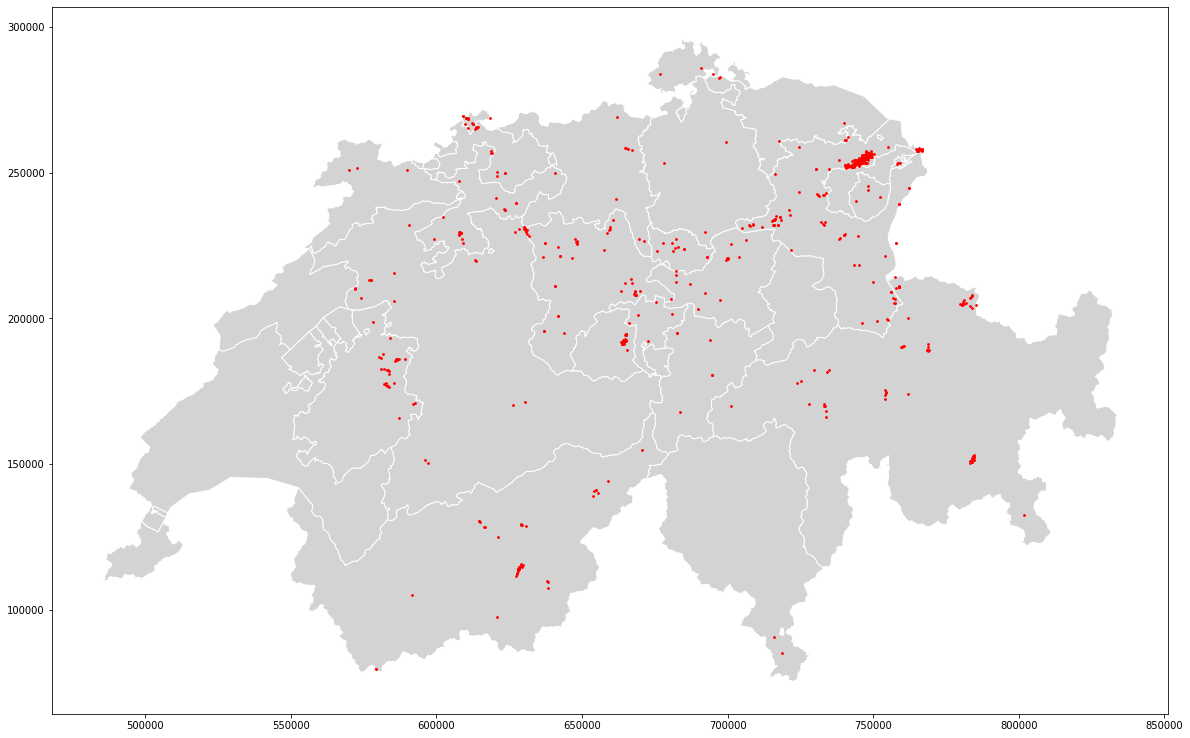

In [92]:
# Ganze Schweiz mit allen Punkten 'St. '
ax = gdf_kantone.plot(figsize=(20,15), color='lightgrey', edgecolor='white')
test_sankt.plot(markersize=3, color='red', ax=ax)

# Punkte auf Karte Kanton ZH

In [93]:
gdf_zh = gdf_kantone[gdf_kantone['KTNAME'] == 'Zürich']

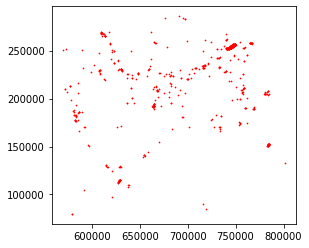

In [94]:
# Alle Punkte 'St. '
test_sankt.plot(color='red', markersize=0.5)

In [104]:
#gdf_kantone.plot()

In [96]:
gdf_kantone['KTNAME'].unique()

array(['Zürich', 'Bern / Berne', 'Luzern', 'Uri', 'Schwyz', 'Obwalden',
       'Nidwalden', 'Glarus', 'Zug', 'Fribourg / Freiburg', 'Solothurn',
       'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen',
       'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen',
       'Graubünden / Grigioni / Grischun', 'Aargau', 'Thurgau', 'Ticino',
       'Vaud', 'Valais / Wallis', 'Neuchâtel', 'Genève', 'Jura'],
      dtype=object)

In [99]:
# Karte und Punkte zusammenbringen
gdf_merged = gpd.sjoin(test_sankt, gdf_kantone, how='left', op='within')

In [100]:
gdf_merged.columns

Index(['UUID', 'OBJEKTART', 'OBJEKTKLAS', 'HOEHE', 'GEBAEUDENU', 'NAME_UUID',
       'NAME', 'STATUS', 'SPRACHCODE', 'NAMEN_TYP', 'NAMENGRUPP', 'geometry',
       'index_right', 'KTNR', 'KTNAME', 'GRNR', 'AREA_HA', 'X_MIN', 'X_MAX',
       'Y_MIN', 'Y_MAX', 'X_CNTR', 'Y_CNTR', 'Z_MIN', 'Z_MAX', 'Z_AVG',
       'Z_MED', 'E_MIN', 'E_MAX', 'N_MIN', 'N_MAX', 'E_CNTR', 'N_CNTR'],
      dtype='object')

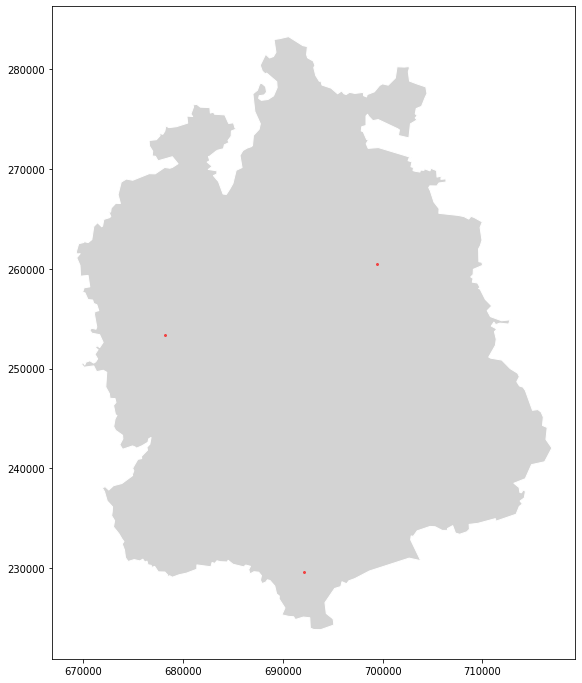

In [103]:
# Kanton ZH mit Punkten 'St. '
ax = gdf_kantone[gdf_kantone['KTNAME'] == 'Zürich'].plot(color='lightgrey', edgecolor='white', figsize=(10,12))
gdf_merged[gdf_merged['KTNAME'] == 'Zürich'].plot(markersize=4, color='red', alpha=0.6, ax=ax)

Nur drei Namensanfänge 'St. ' im Kanton Zürich, wenn es allein in der Stadt Zürich diverse Kirchen mit dem Namen gibt?

# Fazit
# Der Datensatz ist nicht ausreichend für die Themenstellung.

In [ ]:
## Daten abspeichern
##xxxx.to_csv(path, index=xxx) #True/False
